
New Topics:

 * Exploratory Data Analysis
  

Coding Task:

This week, you will build off of your work from last week.
1. First, (if you haven't done so already), create a new column indicating the SHADAC classification for each Tennessee county. You can use the following code to accomplish this:
```
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'
```
2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.
3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.
4. How do unemployment rates compare for urban counties versus rural counties?
5. Create a new column, `pcp_per_100k` which contains the number of primary care physicians per 100,000 residents. Investigate the relationship between this new measure and the unemployment rate per county. What do you find?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')
population = pd.read_csv('../data/population_by_county.csv')
unemployment = pd.read_csv('../data/tn_unemployment.csv')
physicians

,FIPS,state,county,primary_care_physicians
0,1001,Alabama,Autauga,26.0
1,1003,Alabama,Baldwin,153.0
2,1005,Alabama,Barbour,8.0
3,1007,Alabama,Bibb,12.0
4,1009,Alabama,Blount,12.0
...,...,...,...,...
3225,72151,Puerto Rico,Yabucoa,5.0
3226,72153,Puerto Rico,Yauco,43.0
3227,78010,US Virgin Islands,St. Croix,14.0
3228,78020,US Virgin Islands,St. John,1.0


In [3]:
physicians = physicians.loc[physicians["state"] == "Tennessee"]
physicians

,FIPS,state,county,primary_care_physicians
2432,47001,Tennessee,Anderson,39.0
2433,47003,Tennessee,Bedford,15.0
2434,47005,Tennessee,Benton,3.0
2435,47007,Tennessee,Bledsoe,1.0
2436,47009,Tennessee,Blount,90.0
...,...,...,...,...
2522,47181,Tennessee,Wayne,5.0
2523,47183,Tennessee,Weakley,18.0
2524,47185,Tennessee,White,9.0
2525,47187,Tennessee,Williamson,338.0


In [5]:
population = population.loc[population["state"] == "TENNESSEE"]
population

,FIPS,population,county,state,urban
283,47165,183437,Sumner County,TENNESSEE,Urban
284,47169,10231,Trousdale County,TENNESSEE,Urban
285,47027,7654,Clay County,TENNESSEE,Rural
405,47157,936374,Shelby County,TENNESSEE,Urban
406,47077,27977,Henderson County,TENNESSEE,Rural
...,...,...,...,...,...
3195,47123,46064,Monroe County,TENNESSEE,Rural
3196,47079,32284,Henry County,TENNESSEE,Rural
3197,47033,14399,Crockett County,TENNESSEE,Rural
3198,47095,7401,Lake County,TENNESSEE,Rural


In [22]:
physicians['state'] = physicians['state'].str.replace('Tennessee', 'tennessee')
physicians

<ipython-input-22-b12ce272d25a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physicians['state'] = physicians['state'].str.replace('Tennessee', 'tennessee')


,FIPS,state,county,primary_care_physicians
2432,47001,tennessee,Anderson,39.0
2433,47003,tennessee,Bedford,15.0
2434,47005,tennessee,Benton,3.0
2435,47007,tennessee,Bledsoe,1.0
2436,47009,tennessee,Blount,90.0
...,...,...,...,...
2522,47181,tennessee,Wayne,5.0
2523,47183,tennessee,Weakley,18.0
2524,47185,tennessee,White,9.0
2525,47187,tennessee,Williamson,338.0


In [23]:
population['county']=population['county'].str.split(' County', expand = True)[0]
population

,FIPS,population,county,state,urban
283,47165,183437,Sumner,TENNESSEE,Urban
284,47169,10231,Trousdale,TENNESSEE,Urban
285,47027,7654,Clay,TENNESSEE,Rural
405,47157,936374,Shelby,TENNESSEE,Urban
406,47077,27977,Henderson,TENNESSEE,Rural
...,...,...,...,...,...
3195,47123,46064,Monroe,TENNESSEE,Rural
3196,47079,32284,Henry,TENNESSEE,Rural
3197,47033,14399,Crockett,TENNESSEE,Rural
3198,47095,7401,Lake,TENNESSEE,Rural


In [24]:
population['state'] = population['state'].str.lower()
population

,FIPS,population,county,state,urban
283,47165,183437,Sumner,tennessee,Urban
284,47169,10231,Trousdale,tennessee,Urban
285,47027,7654,Clay,tennessee,Rural
405,47157,936374,Shelby,tennessee,Urban
406,47077,27977,Henderson,tennessee,Rural
...,...,...,...,...,...
3195,47123,46064,Monroe,tennessee,Rural
3196,47079,32284,Henry,tennessee,Rural
3197,47033,14399,Crockett,tennessee,Rural
3198,47095,7401,Lake,tennessee,Rural


In [25]:
physicians = pd.merge(physicians, population)
physicians

,FIPS,state,county,primary_care_physicians,population,urban
0,47001,tennessee,Anderson,39.0,76061,Urban
1,47003,tennessee,Bedford,15.0,48292,Rural
2,47005,tennessee,Benton,3.0,16140,Rural
3,47007,tennessee,Bledsoe,1.0,14836,Rural
4,47009,tennessee,Blount,90.0,129927,Urban
...,...,...,...,...,...,...
90,47181,tennessee,Wayne,5.0,16693,Rural
91,47183,tennessee,Weakley,18.0,33510,Rural
92,47185,tennessee,White,9.0,26800,Rural
93,47187,tennessee,Williamson,338.0,225389,Urban


In [26]:
physicians['residents_per_pcp'] = (physicians['population'] / physicians['primary_care_physicians'])
physicians

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp
0,47001,tennessee,Anderson,39.0,76061,Urban,1950.282051
1,47003,tennessee,Bedford,15.0,48292,Rural,3219.466667
2,47005,tennessee,Benton,3.0,16140,Rural,5380.000000
3,47007,tennessee,Bledsoe,1.0,14836,Rural,14836.000000
4,47009,tennessee,Blount,90.0,129927,Urban,1443.633333
...,...,...,...,...,...,...,...
90,47181,tennessee,Wayne,5.0,16693,Rural,3338.600000
91,47183,tennessee,Weakley,18.0,33510,Rural,1861.666667
92,47185,tennessee,White,9.0,26800,Rural,2977.777778
93,47187,tennessee,Williamson,338.0,225389,Urban,666.831361


In [27]:
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
       (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'
physicians

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
0,47001,tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
1,47003,tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate
2,47005,tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate
3,47007,tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate
4,47009,tennessee,Blount,90.0,129927,Urban,1443.633333,adequate
...,...,...,...,...,...,...,...,...
90,47181,tennessee,Wayne,5.0,16693,Rural,3338.600000,moderately inadequate
91,47183,tennessee,Weakley,18.0,33510,Rural,1861.666667,moderately inadequate
92,47185,tennessee,White,9.0,26800,Rural,2977.777778,moderately inadequate
93,47187,tennessee,Williamson,338.0,225389,Urban,666.831361,adequate


In [28]:
pd.crosstab(physicians['shadac_category'], physicians['urban'], normalize = 'index')  
#physicians.groupby(["urban", "shadac_category"]).size()

urban,Rural,Urban
shadac_category,,
adequate,0.357143,0.642857
low inadequate,0.677419,0.322581
moderately inadequate,0.620000,0.380000


(array([0, 1, 2]),
 [Text(0, 0, 'adequate'),
  Text(1, 0, 'low inadequate'),
  Text(2, 0, 'moderately inadequate')])

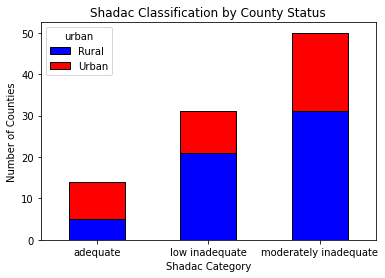

In [29]:
pd.crosstab(physicians['shadac_category'], physicians['urban']).plot(kind = 'bar', 
                                                          stacked = True,       # stacked as opposed to side-by-side
                                                          color = ['Blue', 'Red'],     # change the default colors
                                                          edgecolor = 'Black')
plt.title('Shadac Classification by County Status') 
plt.xlabel('Shadac Category')
plt.ylabel('Number of Counties')
plt.xticks(rotation = 0)  

(array([0, 1]), [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

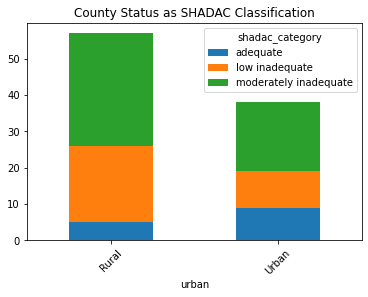

In [31]:
pd.crosstab(physicians["urban"], physicians["shadac_category"]).plot(kind = "bar", stacked = True)
plt.title("County Status as SHADAC Classification")
plt.xticks(rotation = 45)

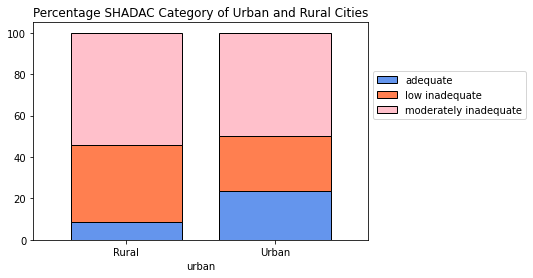

In [32]:
(pd.crosstab(physicians['urban'], physicians['shadac_category'],  normalize = 'index') * 100).plot(kind = 'bar', 
                                                                                        stacked = True,
                                                                                        color = ['cornflowerblue', 'coral', 'pink'],
                                                                                        edgecolor = 'black',
                                                                                        width = 0.75,
                                                                                       )
plt.title('Percentage SHADAC Category of Urban and Rural Cities')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');   # move the legend to the right side of the plot

In [107]:
unemployment

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6
...,...,...,...,...,...,...,...,...,...
90,CN4718100000000,47,181,"Wayne County, TN",Mar-21,6416,6074,342,5.3
91,CN4718300000000,47,183,"Weakley County, TN",Mar-21,15494,14783,711,4.6
92,CN4718500000000,47,185,"White County, TN",Mar-21,12085,11484,601,5.0
93,CN4718700000000,47,187,"Williamson County, TN",Mar-21,129484,125213,4271,3.3


In [108]:
physicians

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
0,47001,tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
1,47003,tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate
2,47005,tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate
3,47007,tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate
4,47009,tennessee,Blount,90.0,129927,Urban,1443.633333,adequate
...,...,...,...,...,...,...,...,...
90,47181,tennessee,Wayne,5.0,16693,Rural,3338.600000,moderately inadequate
91,47183,tennessee,Weakley,18.0,33510,Rural,1861.666667,moderately inadequate
92,47185,tennessee,White,9.0,26800,Rural,2977.777778,moderately inadequate
93,47187,tennessee,Williamson,338.0,225389,Urban,666.831361,adequate


In [34]:
cleaned_unemployment = unemployment[['LF','Name', 'Employed', 'Unemployed', 'unemployment_rate']]
cleaned_unemployment


,LF,Name,Employed,Unemployed,unemployment_rate
0,34704,"Anderson County, TN",33010,1694,4.9
1,20623,"Bedford County, TN",19550,1073,5.2
2,6723,"Benton County, TN",6305,418,6.2
3,4252,"Bledsoe County, TN",3947,305,7.2
4,64098,"Blount County, TN",61119,2979,4.6
...,...,...,...,...,...
90,6416,"Wayne County, TN",6074,342,5.3
91,15494,"Weakley County, TN",14783,711,4.6
92,12085,"White County, TN",11484,601,5.0
93,129484,"Williamson County, TN",125213,4271,3.3


In [1]:
cleaned_unemployment.rename(columns={'Name': 'county', 'Employed': 'employed', 'Unemployed' : 'unemployed', 'unemployment_rate' : 'unemployment_rate', 'LF':'labor_force'}, inplace=True)
cleaned_unemployment

NameError: name 'cleaned_unemployment' is not defined

In [42]:
cleaned_unemployment['county']=cleaned_unemployment['county'].str.split(' County', expand = True)[0]
cleaned_unemployment

,labor_force,county,employed,unemployed,unemployment_rate
0,34704,Anderson,33010,1694,4.9
1,20623,Bedford,19550,1073,5.2
2,6723,Benton,6305,418,6.2
3,4252,Bledsoe,3947,305,7.2
4,64098,Blount,61119,2979,4.6
...,...,...,...,...,...
90,6416,Wayne,6074,342,5.3
91,15494,Weakley,14783,711,4.6
92,12085,White,11484,601,5.0
93,129484,Williamson,125213,4271,3.3


In [45]:
physicians = pd.merge(physicians, cleaned_unemployment)
physicians

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,employed,unemployed,unemployment_rate,pcp_per_100k,labor_force
0,47001,tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9,51.274635,34704
1,47003,tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2,31.061045,20623
2,47005,tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2,18.587361,6723
3,47007,tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2,6.740361,4252
4,47009,tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6,69.269667,64098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,47181,tennessee,Wayne,5.0,16693,Rural,3338.600000,moderately inadequate,6416,6074,342,5.3,29.952675,6416
91,47183,tennessee,Weakley,18.0,33510,Rural,1861.666667,moderately inadequate,15494,14783,711,4.6,53.715309,15494
92,47185,tennessee,White,9.0,26800,Rural,2977.777778,moderately inadequate,12085,11484,601,5.0,33.582090,12085
93,47187,tennessee,Williamson,338.0,225389,Urban,666.831361,adequate,129484,125213,4271,3.3,149.962953,129484


In [38]:
#this is from Katherine Amidon
unemployment = pd.read_csv('../data/tn_unemployment.csv')
unemployment['Name'] = unemployment['Name'].str.split(' County', n =1, expand = True)[0]
pd.merge(left = physicians,
         right = unemployment[['Name', 'Employed', 'Unemployed', 'unemployment_rate']].rename(columns = {'Name': 'county'}))

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,employed,unemployed,unemployment_rate,Employed,Unemployed
0,47001,tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9,33010,1694
1,47003,tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2,19550,1073
2,47005,tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2,6305,418
3,47007,tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2,3947,305
4,47009,tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6,61119,2979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,47181,tennessee,Wayne,5.0,16693,Rural,3338.600000,moderately inadequate,6416,6074,342,5.3,6074,342
91,47183,tennessee,Weakley,18.0,33510,Rural,1861.666667,moderately inadequate,15494,14783,711,4.6,14783,711
92,47185,tennessee,White,9.0,26800,Rural,2977.777778,moderately inadequate,12085,11484,601,5.0,11484,601
93,47187,tennessee,Williamson,338.0,225389,Urban,666.831361,adequate,129484,125213,4271,3.3,125213,4271


In [39]:
physicians.groupby('urban')['unemployment_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
urban,,,,,,,,
Rural,57.0,5.850877,0.976349,3.7,5.200,5.60,6.500,9.3
Urban,38.0,4.918421,0.759749,3.3,4.325,4.85,5.375,7.1


In [40]:
physicians['pcp_per_100k'] = ((physicians['primary_care_physicians'] / physicians['population']) * 100000)
physicians

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,employed,unemployed,unemployment_rate,pcp_per_100k
0,47001,tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9,51.274635
1,47003,tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2,31.061045
2,47005,tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2,18.587361
3,47007,tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2,6.740361
4,47009,tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6,69.269667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,47181,tennessee,Wayne,5.0,16693,Rural,3338.600000,moderately inadequate,6416,6074,342,5.3,29.952675
91,47183,tennessee,Weakley,18.0,33510,Rural,1861.666667,moderately inadequate,15494,14783,711,4.6,53.715309
92,47185,tennessee,White,9.0,26800,Rural,2977.777778,moderately inadequate,12085,11484,601,5.0,33.582090
93,47187,tennessee,Williamson,338.0,225389,Urban,666.831361,adequate,129484,125213,4271,3.3,149.962953


In [127]:
physicians[['unemployment_rate', 'pcp_per_100k']].corr()

,unemployment_rate,pcp_per_100k
unemployment_rate,1.000000,-0.335333
pcp_per_100k,-0.335333,1.000000


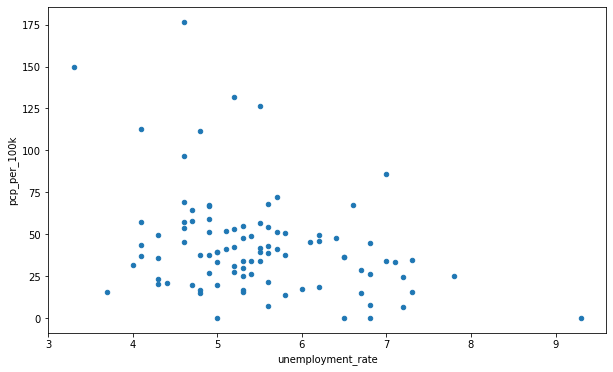

In [128]:
physicians.plot(kind = 'scatter',
             x = 'unemployment_rate',
             y = 'pcp_per_100k',
             figsize = (10,6));